<a href="https://colab.research.google.com/github/670510747/229352-StatisticalLearning/blob/main/Lab06_SVM_670510747.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

Rattanatham saopha\
670510747

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

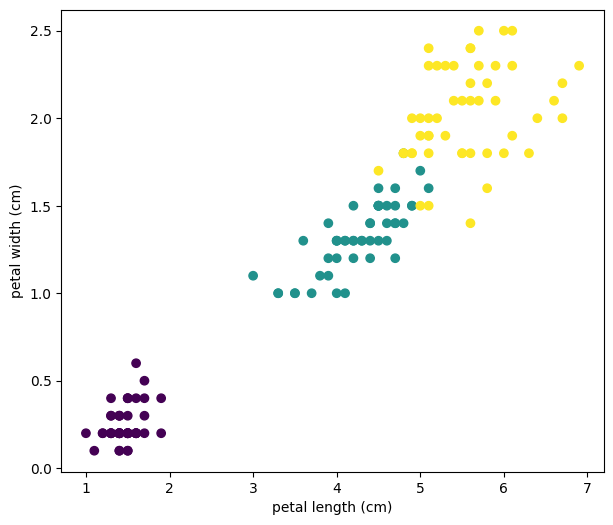

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [5]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

Decision Boundary for C = 0.01


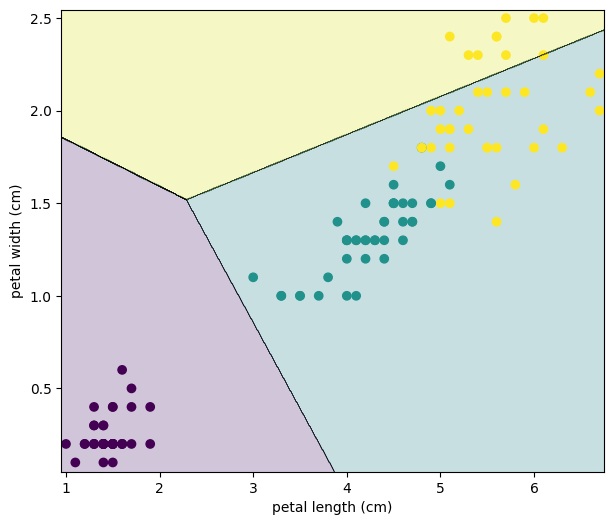

Decision Boundary for C = 0.1


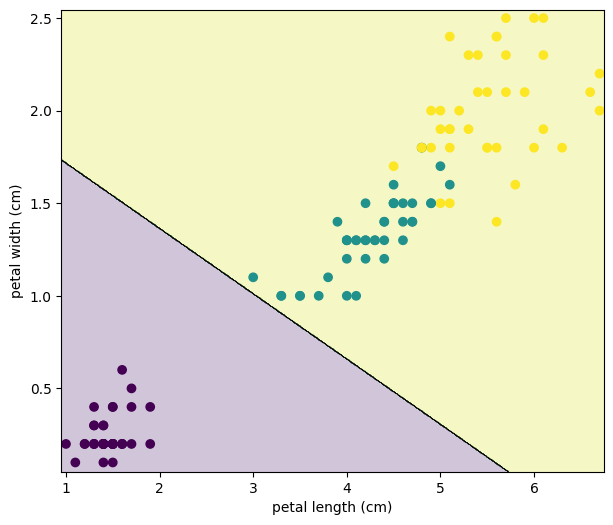

Decision Boundary for C = 1.0


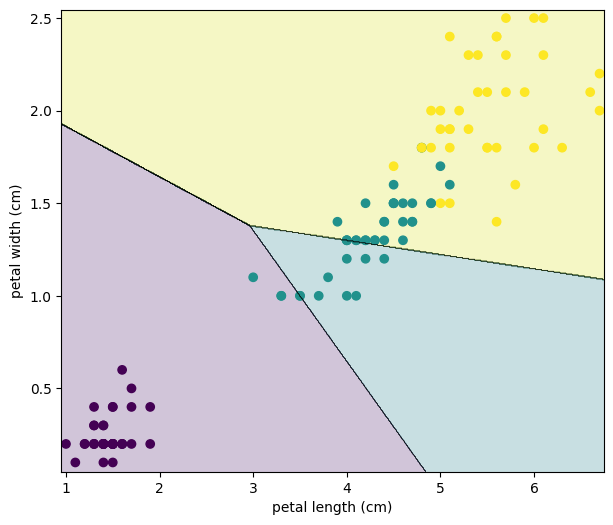

Decision Boundary for C = 10.0


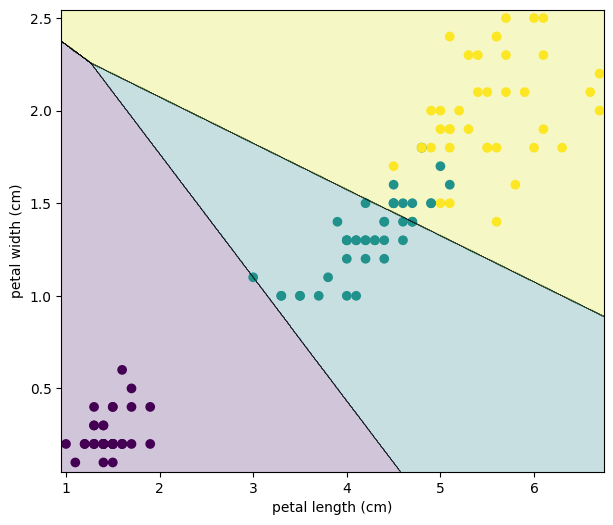

Decision Boundary for C = 100.0


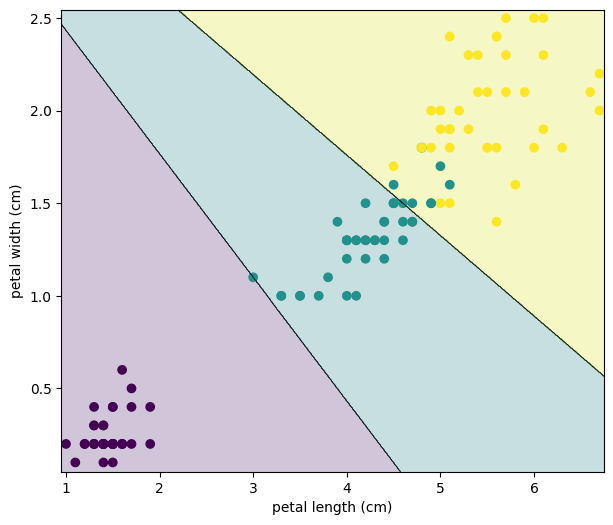

In [6]:
#TODO
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for C in C_values:
    clf = LinearSVC(loss='hinge', C=C, max_iter=100000, random_state=42)
    clf.fit(X_train, y_train)
    print(f'Decision Boundary for C = {C}')
    plot_decision_boundary(clf, X_train, y_train)
    plt.show()

ค่า C น้อย = โมเดลจะยอมให้เกิดการจำแนกผิดได้บ้างเพื่อให้ได้ Margin ที่กว้างขึ้นผลลัพธ์คือเส้นแบ่งจะเรียบง่าย แต่อาจจะ Underfit ได้

ค่า C มาก = โมเดลจะพยายามจำแนกข้อมูลทุกจุดให้ถูกต้องที่สุดทำให้ Margin แคบลง เส้นแบ่งจะพยายามขยับเพื่อให้ไม่โดนข้อมูล ซึ่งเสี่ยงต่อการเกิด Overfitting

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [7]:
#TODO
selected_C = 1.0
clf_linear = LinearSVC(loss='hinge', C=selected_C, max_iter=100000, random_state=42)
clf_linear.fit(X_train, y_train)

accuracy = clf_linear.score(X_test, y_test)
test_error = 1 - accuracy

print(f"Selected C: {selected_C}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Error: {test_error:.4f}")

Selected C: 1.0
Test Accuracy: 0.8333
Test Error: 0.1667


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

Decision Boundary for Gamma = 0.01


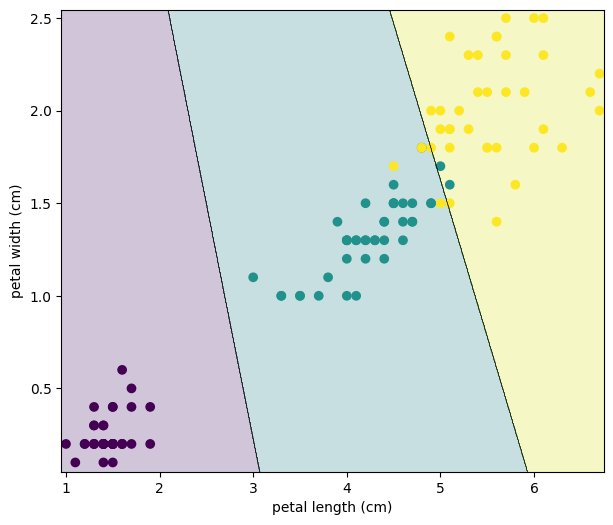

Decision Boundary for Gamma = 0.1


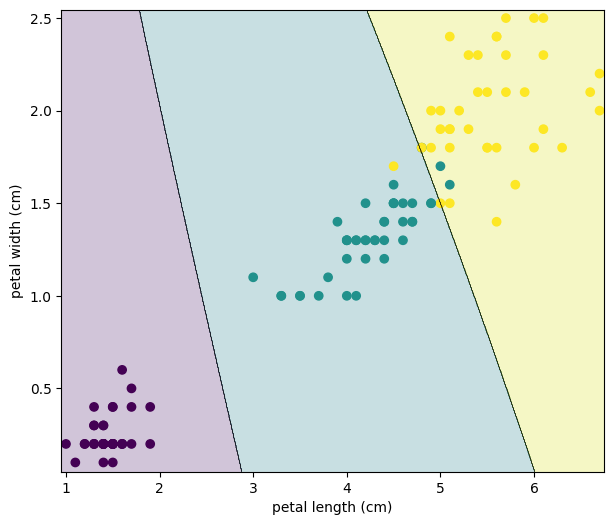

Decision Boundary for Gamma = 1.0


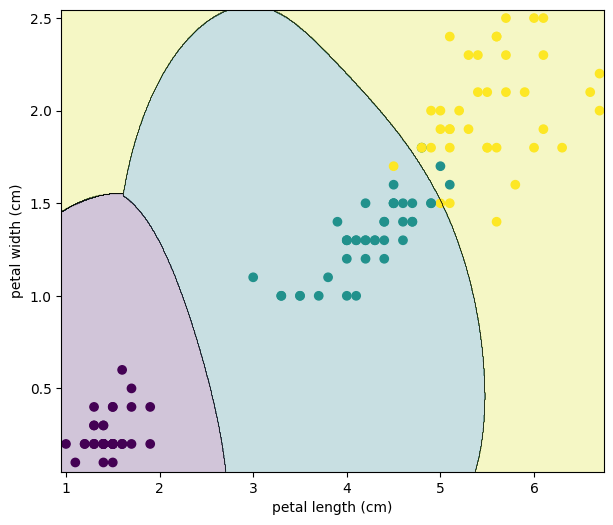

Decision Boundary for Gamma = 10.0


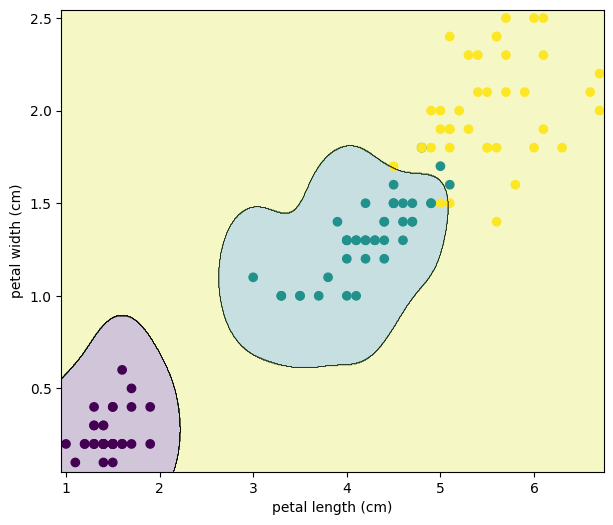

Decision Boundary for Gamma = 100.0


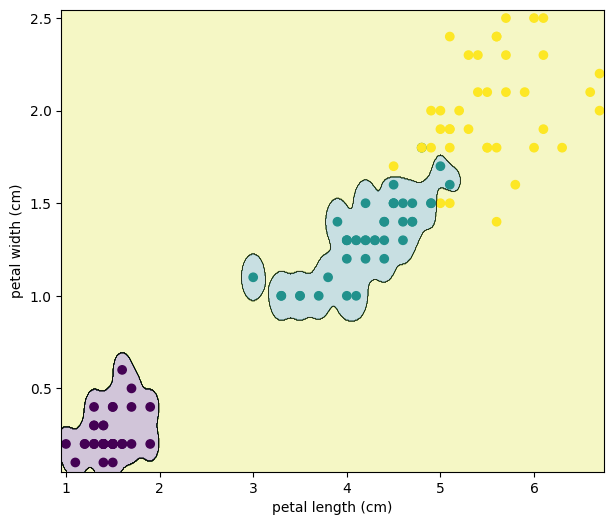

In [8]:
#TODO
gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for gamma in gamma_values:
    clf_rbf = SVC(kernel='rbf', C=1.0, gamma=gamma, max_iter=100000, random_state=42)
    clf_rbf.fit(X_train, y_train)

    print(f'Decision Boundary for Gamma = {gamma}')
    plot_decision_boundary(clf_rbf, X_train, y_train)
    plt.show()

ค่า Gamma น้อย =  รัศมีอิทธิพลของข้อมูลแต่ละจุดจะกว้าง เส้นแบ่งขอบเขต  จะมีความเรียบ คล้ายกับ Linear

ค่า Gamma มาก = รัศมีอิทธิพลของข้อมูลแต่ละจุดจะแคบมาก โมเดลจะสนใจข้อมูลรายตัวมากเกินไป ทำให้เส้นแบ่งขอบเขตมีความยึกยือ หรือเป็นวงกลมล้อมรอบกลุ่มข้อมูลเฉพาะจุด ซึ่งจะนำไปสู่การ Overfitting อย่างรุนแรง

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [9]:
#TODO
selected_gamma = 1.0
clf_rbf_final = SVC(kernel='rbf', C=1.0, gamma=selected_gamma, random_state=42)
clf_rbf_final.fit(X_train, y_train)

accuracy_rbf = clf_rbf_final.score(X_test, y_test)
test_error_rbf = 1 - accuracy_rbf

print(f"Selected Gamma: {selected_gamma}")
print(f"Test Error: {test_error_rbf:.4f}")
print(f"Number of support vectors (per class): {clf_rbf_final.n_support_}")
print(f"Total support vectors: {np.sum(clf_rbf_final.n_support_)}")

Selected Gamma: 1.0
Test Error: 0.0000
Number of support vectors (per class): [ 3 12 15]
Total support vectors: 30


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [ ]:
#TODO

1.Explain using test accuracy:

จากกากผล ส่วนใหญ่ Kernel SVM (RBF) มักจะให้ค่า Accuracy ที่สูงกว่าหรือเท่ากับ Linear SVM เล็กน้อย เนื่องจากชุดข้อมูล Iris ในบางมิติมีความซ้อนทับกันแบบ Non-linear

ตัวอย่าง: Linear อาจได้ Error 0.03-0.06 ในขณะที่ RBF อาจได้ Error ต่ำกว่า

2.Explain using decision boundary plot:

Linear SVM: สร้างเส้นแบ่งเป็นเส้นตรงซึ่งอาจจะไม่ยืดหยุ่นพอในการแยกคลาสที่อยู่ตรงกลางหรือมีการกระจายตัวแบบโค้ง

Kernel SVM (RBF): สามารถสร้างเส้นแบ่งที่มีความโค้งมนโอบล้อมกลุ่มข้อมูลได้ดีกว่า ทำให้สามารถแยกข้อมูลที่ซับซ้อนได้แม่นยำกว่า แต่ต้องระวังเรื่อง Overfitting หากปรับ Gamma สูงเกินไป

สรุป : สำหรับข้อมูลชุดนี้ Kernel SVM น่าจะเหมาะสมกว่าหากต้องการความแม่นยำสูงสุด